**Nama: Dwi Putra Satria utama**

**Problem Statement:**
Perusahaan menghadapi tantangan dalam meminimalkan risiko pelanggan berhenti (churn) dari produk yang mereka tawarkan. Dalam rangka menjaga keberlanjutan bisnis dan kepuasan pelanggan, perusahaan membutuhkan solusi yang dapat memprediksi pelanggan yang berpotensi berhenti menggunakan produk mereka. Oleh karena itu, perlu dikembangkan model prediksi churn yang dapat mengidentifikasi pelanggan yang memiliki kemungkinan tinggi untuk berhenti, sehingga perusahaan dapat mengambil langkah-langkah proaktif untuk mempertahankan pelanggan tersebut.

**Objectives:**
Mengembangkan model prediksi churn yang akurat berdasarkan data historis pelanggan, untuk membantu perusahaan mengidentifikasi pelanggan yang berpotensi berhenti dan mengambil tindakan proaktif guna mempertahankan pelanggan serta meningkatkan retensi pelanggan secara keseluruhan.

Dengan demikian, tujuan utama dari proyek ini adalah mengembangkan model prediksi churn yang akurat dan memberikan wawasan berharga kepada perusahaan untuk mengambil tindakan proaktif dalam menjaga kepuasan pelanggan dan meminimalkan risiko churn.

# 2 - Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import chi2_contingency
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
import time
import pickle
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping



# 3 - Data loading

In [3]:
df = pd.read_csv('churn.csv')

# menampilkan 10 baris pertama
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# menampilkan 10 baris terakhir
df.tail(10)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# copy data
df_copy=df.copy()

Diperlukan jika dibutuhkan

- user_id: ID pelanggan.
- age: Usia pelanggan.
- gender: Jenis kelamin pelanggan.
- region_category: Kategori wilayah tempat pelanggan tinggal.
- membership_category: Kategori keanggotaan yang digunakan oleh pelanggan.
- joining_date: Tanggal ketika pelanggan menjadi anggota.
- joined_through_referral: Apakah pelanggan bergabung melalui kode atau ID rujukan.
- preferred_offer_types: Jenis penawaran yang disukai oleh pelanggan.
- medium_of_operation: Media operasi yang digunakan pelanggan untuk transaksi.
- internet_option: Jenis layanan internet yang digunakan oleh pelanggan.
- last_visit_time: Waktu terakhir pelanggan mengunjungi situs web.
- days_since_last_login: Jumlah hari sejak pelanggan terakhir kali masuk ke situs web.
- avg_time_spent: Rata-rata waktu yang dihabiskan oleh pelanggan di situs web.
- avg_transaction_value: Nilai transaksi rata-rata pelanggan.
- avg_frequency_login_days: Jumlah kali pelanggan masuk ke situs web.
- points_in_wallet: Poin yang diberikan kepada pelanggan setiap kali bertransaksi.
- used_special_discount: Apakah pelanggan menggunakan diskon khusus yang ditawarkan.
- offer_application_preference: Apakah pelanggan memiliki preferensi penawaran.
- past_complaint: Apakah pelanggan pernah mengajukan keluhan.
- complaint_status: Status penyelesaian keluhan yang diajukan oleh pelanggan.
- feedback: Umpan balik yang diberikan oleh pelanggan.
- churn_risk_score: Skor churn (risiko putus langganan).

    0 : Tidak putus langganan (tidak churn)
    
    1 : Putus langganan (churn)

# 4 - Eksploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Data terdiri dari 37010 baris dan 22 kolom

Terdapat missing value

Sebagian data adalah numerik dan sebagian lainnya merupakan kategori

In [7]:
# cek data hilang
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Data hilang akan kita handling dengan cara dihapus agar tidak mengacaukan model

In [8]:
# menghapus data yang hilang
df.dropna(inplace=True)

In [9]:
# menghitung data yang terduplikasi
duplicate = df.duplicated().sum()
duplicate

11

Data duplikat akan kita hapus agar tidak mengcaukan model

In [10]:
# handling data duplikat
df = df.drop_duplicates()
df.shape

(22853, 22)

In [11]:
# Pisahkan kategori dan numerik untuk mencari korelasi
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

In [12]:
# Membuat list untuk menyimpan hasil uji chi-square
results_list = []

# Melakukan uji chi-square untuk setiap kolom kategorikal
for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['churn_risk_score'])
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    results_list.append({
        'Column': column,
        'Chi-square': chi2,
        'P-value': p_value
    })

# Mengonversi uji chi-square menjadi DataFrame
chi_square_results = pd.DataFrame(results_list)
chi_square_results

,Column,Chi-square,P-value
0,user_id,22853.000000,4.968899e-01
1,gender,0.059490,8.073041e-01
2,region_category,13.722958,1.047364e-03
3,membership_category,14091.771193,0.000000e+00
4,joining_date,1094.300607,5.002797e-01
5,joined_through_referral,23.316364,1.374258e-06
6,preferred_offer_types,41.916127,7.907308e-10
7,medium_of_operation,14.374172,7.562896e-04
8,internet_option,1.054225,5.903070e-01
9,last_visit_time,20095.482962,4.011945e-01


Dari data hasil uji chi-square tersebut, fitur-fitur yang memiliki korelasi dengan variabel target adalah  region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, offer_application_preference, feedback.

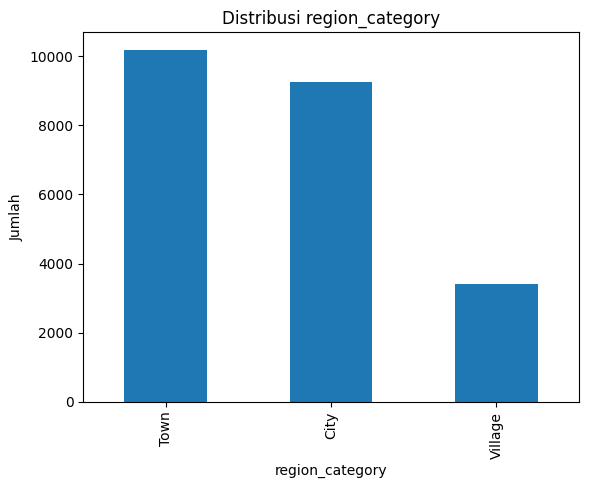

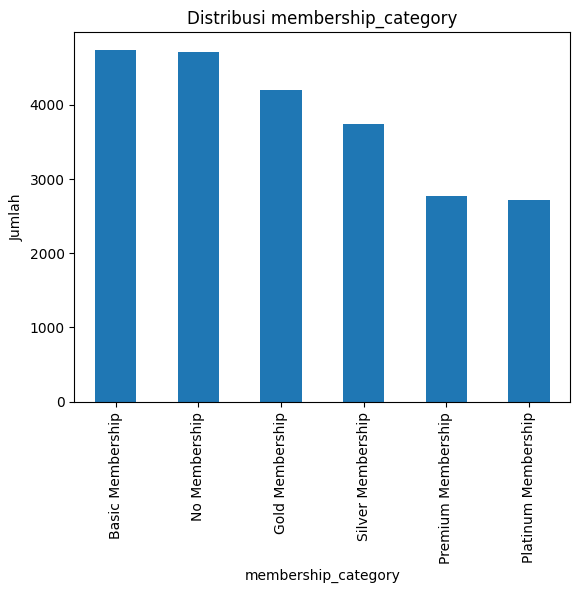

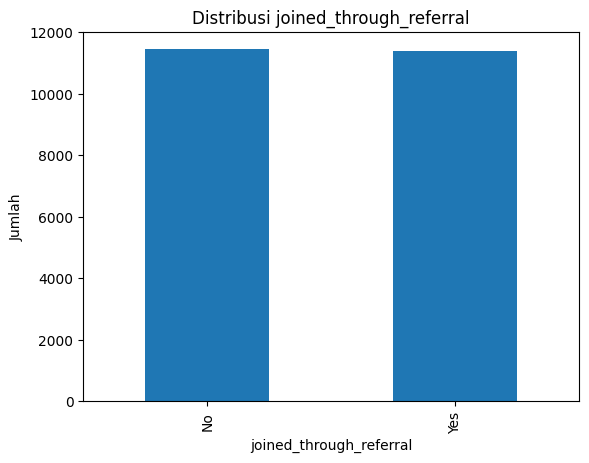

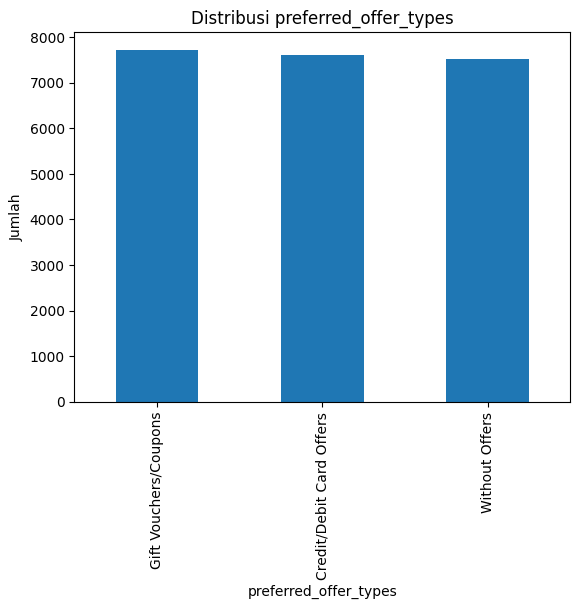

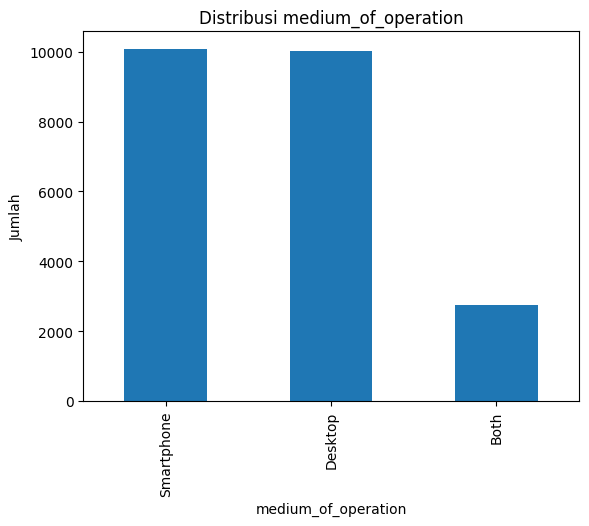

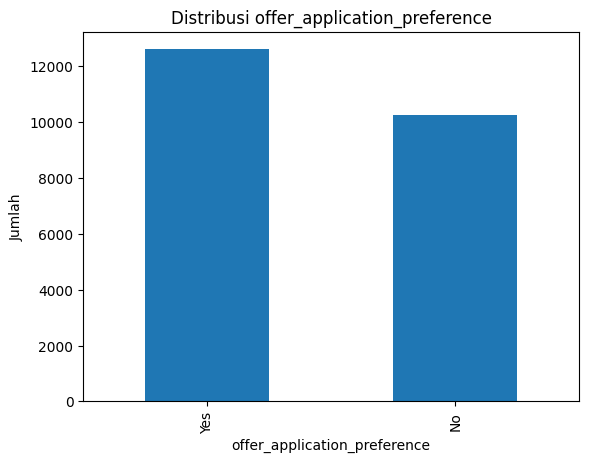

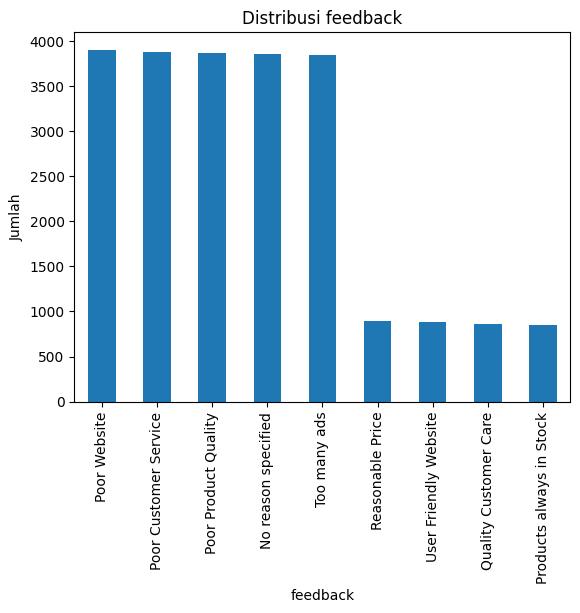

region_category
Town       10190
City        9257
Village     3406
Name: count, dtype: int64

membership_category
Basic Membership       4738
No Membership          4702
Gold Membership        4196
Silver Membership      3740
Premium Membership     2768
Platinum Membership    2709
Name: count, dtype: int64

joined_through_referral
No     11448
Yes    11405
Name: count, dtype: int64

preferred_offer_types
Gift Vouchers/Coupons       7722
Credit/Debit Card Offers    7614
Without Offers              7517
Name: count, dtype: int64

medium_of_operation
Smartphone    10075
Desktop       10024
Both           2754
Name: count, dtype: int64

offer_application_preference
Yes    12597
No     10256
Name: count, dtype: int64

feedback
Poor Website                3905
Poor Customer Service       3877
Poor Product Quality        3866
No reason specified         3859
Too many ads                3848
Reasonable Price             898
User Friendly Website        883
Quality Customer Care        862
Prod

In [13]:
# Cek visualisasi distribusi fitur kategori yang berkorelasi
korelasi_columns = ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
                       'medium_of_operation', 'offer_application_preference', 'feedback']

# Visualisasi distribusi
for column in korelasi_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.show()

# Pemeriksaan jumlah kategori
for column in korelasi_columns:
    print(df[column].value_counts())
    print()

Berdasarkan hasil tersebut bahwa sebagian data kategori relatif balance dan sebagian lainnya imbalance

In [14]:
# Menghitung korelasi antara variabel numerik dengan variabel target
correlation_results = df[numerical_columns + ['churn_risk_score']].corr()['churn_risk_score'].drop('churn_risk_score')

# Menjadikan dataframe
correlation_df = pd.DataFrame(correlation_results)
correlation_df


,churn_risk_score,churn_risk_score
age,0.005293,0.005293
days_since_last_login,0.001207,0.001207
avg_time_spent,-0.010695,-0.010695
avg_transaction_value,-0.218790,-0.218790
avg_frequency_login_days,0.118218,0.118218
points_in_wallet,-0.192792,-0.192792


Dari data hasil uji korelasi pearson, fitur-fitur yang memiliki korelasi dengan variabel target adalah avg_transaction_value, avg_frequency_login_days, points_in_wallet.

Jumlah: churn_risk_score
1    12246
0    10607
Name: count, dtype: int64


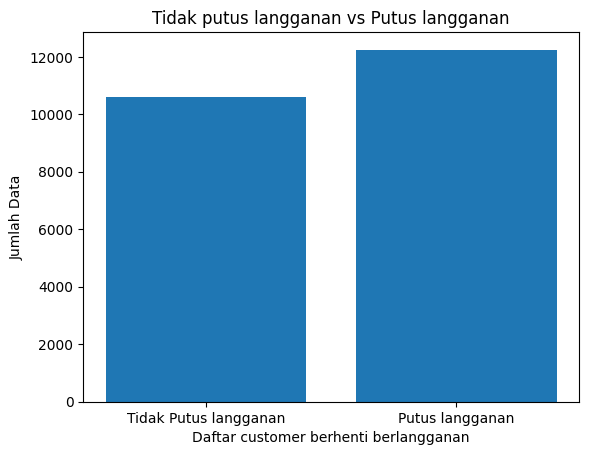

In [15]:
# cek data target

# Hitung jumlah data
status_count = df['churn_risk_score'].value_counts()
print('Jumlah:', status_count)

# Visualisasi perbandingan jumlah data
plt.bar(status_count.index, status_count.values)
plt.xlabel('Daftar customer berhenti berlangganan')
plt.ylabel('Jumlah Data')

# Atur label sumbu x
plt.xticks([0, 1], ['Tidak Putus langganan', 'Putus langganan'])

# Atur judul dan sumbu y
plt.title('Tidak putus langganan vs Putus langganan')
plt.ylabel('Jumlah Data')

plt.show()

Berdasarkan hasil tersebut data target relatif balance

In [16]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,22853.000000,22853.000000,22853.000000,22853.000000,22853.000000,22853.000000,22853.000000
mean,36.988885,-42.636634,280.290843,29321.835615,14.694795,623.610681,0.535860
std,15.899740,230.312948,334.371139,19540.703372,9.488088,270.986150,0.498723
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,59.840000,14224.220000,7.000000,573.513497,0.000000
50%,37.000000,12.000000,161.190000,27553.210000,14.000000,681.490000,1.000000
75%,51.000000,16.000000,355.210000,40874.040000,22.000000,757.780000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


- Age:

    Rata-rata usia pelanggan adalah sekitar 37 tahun, dengan usia terendah 10 tahun dan usia tertinggi 64 tahun.

    Sebagian besar pelanggan berada dalam rentang usia antara 23 hingga 51 tahun.

- Hari Sejak Terakhir Login (Days Since Last Login):

    Rata-rata jumlah hari sejak pelanggan terakhir kali login adalah sekitar -43 hari. Angka tersebut menunjukkan bahwa sebagian besar pelanggan login dalam 43 hari yang lalu.


- Waktu Rata-rata yang Dihabiskan Pelanggan (Average Time Spent):

    Rata-rata waktu yang dihabiskan pelanggan di situs web adalah sekitar 280 menit (atau sekitar 4,67 jam).

    Waktu yang dihabiskan pelanggan berkisar dari 0 hingga 3235 menit (sekitar 53,92 jam).

- Nilai Transaksi Rata-rata (Average Transaction Value):

    Rata-rata nilai transaksi pelanggan adalah sekitar 29.322.000.

    Nilai transaksi pelanggan berkisar dari 800.460 hingga 99.914.050.

- Rata-rata Frekuensi Login (Average Frequency Login Days):

    Rata-rata frekuensi login pelanggan adalah sekitar 14 kali.

    Frekuensi login berkisar dari 0 hingga 73, yang menunjukkan variasi besar dalam frekuensi login pelanggan.

- Poin di Dompet (Points in Wallet):

    Rata-rata poin yang diberikan kepada pelanggan pada setiap transaksi adalah sekitar 624.

    Jumlah poin dalam dompet pelanggan berkisar dari 0 hingga 2069.

- Skor Churn (Churn Risk Score):

    Rata-rata skor churn pelanggan adalah sekitar 0,54, yang menunjukkan adanya kecenderungan bahwa lebih banyak pelanggan cenderung berisiko putus langganan (churn).

    Skor churn berada dalam rentang 0 hingga 1, dengan 0 menunjukkan tidak ada risiko putus langganan (tidak churn) dan 1 menunjukkan risiko putus langganan (churn).

In [17]:
# Drop column yang tidak digunakan 
df.drop(['user_id', 'age', 'gender', 'joining_date', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'used_special_discount', 'past_complaint', 'complaint_status'],axis=1, inplace=True)

# 5 - Data preprocessing

## Feature selection

Berdasarkan analisis pada EDA kita akan menggunakan fitur-fitur berikut:

region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, offer_application_preference, feedback, avg_transaction_value, avg_frequency_login_days, points_in_wallet.

## Memisihkan antara fitur `X` dan target `y`

In [18]:
# splitting X dan y
X = df[['region_category', 'membership_category', 'joined_through_referral',
        'preferred_offer_types', 'medium_of_operation', 'offer_application_preference',
        'feedback', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']]
y = df['churn_risk_score']

## Memisahkan antara train, val set, dan test set

In [19]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (16511, 10)
Val Size :  (2914, 10)
Test Size :  (3428, 10)


## Handling outliers

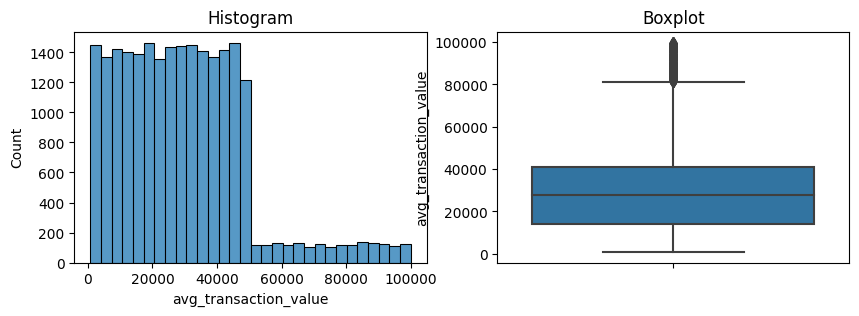

Skewness: 1.019632361905311
The distribution is skewed


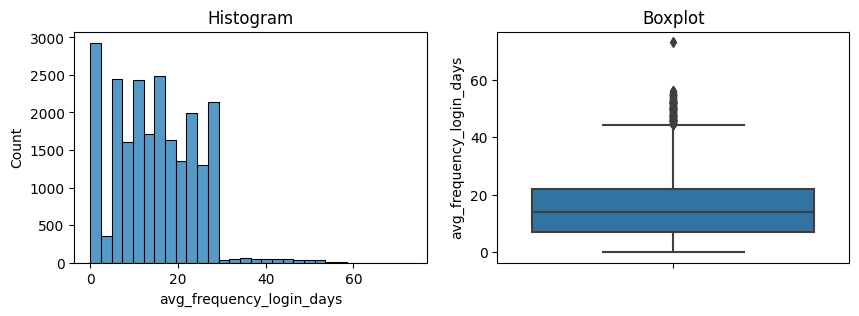

Skewness: 0.3810839690486723
The distribution is normal


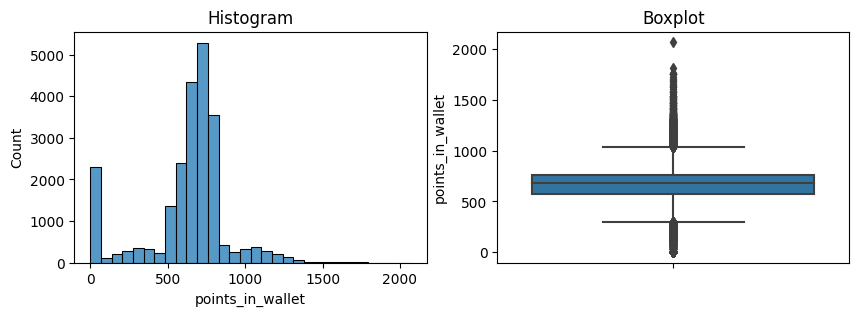

Skewness: -0.7806045894600425
The distribution is skewed


In [20]:
# Cek visualisasi dengan histogram dan boxplot

numeric_columns = ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Cek distribusi data dan outliers
def check_distribution_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[column].skew())
        if (df[column].skew() <= -0.5) or (df[column].skew() >= 0.5):
            print('The distribution is skewed')
        else:
            print('The distribution is normal')

check_distribution_outliers(df[numeric_columns], numeric_columns)

Berdasarkan data tersebut mayoritas data numerik yang berkorelasi terdistribusi secara skewed dan terdapat outliers yang selanjutkan akan dihandling. Outliers dihandling dengan wisorizer untuk mengurangi dampak yang ditimbulkan oleh outliers

In [21]:
# Fungsi untuk penanganan outlier dengan IQR winsorization
def iqr_winsorize_column(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    winsorized = df[column].clip(lower_bound, upper_bound)
    df[column] = winsorized
    return df

# Penanganan outlier dengan IQR winsorization
for feature in numeric_columns:
    df = iqr_winsorize_column(df, feature)

## Feature scaling & encoding

In [22]:
numerical_columns = ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
categorical_columns = ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
                       'medium_of_operation', 'offer_application_preference', 'feedback']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])


In [23]:
# Fit and Transform

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
X_test.shape

(3428, 31)

# 6 - Model

In [24]:
# Tensorflow pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(20)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(20)

## Sequential API

In [25]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
# Create Sequential API
model_sequential = Sequential([
    Dense(30, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed), input_shape=(31,), kernel_regularizer=l2(0.001)), # Hidden layer 1 dengan L2 regularization
    Dropout(0.2),  # Adding Dropout
    Dense(24, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed), kernel_regularizer=l2(0.001)), # Hidden layer 2 dengan L2 regularization
    Dropout(0.2),  # Adding Dropout
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) # Output Layer
])

# Compile dengan RMSprop optimizer
model_sequential.compile(loss='binary_crossentropy',
                         optimizer=RMSprop(learning_rate=0.001),
                         metrics=['accuracy'])

# Summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                744       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


- Activation Function Selu: Aktivasi Selu dipilih karena memiliki keuntungan dalam mencegah vanishing/exploding gradient dan dapat mempercepat konvergensi pada deep neural network.
- Kernel Initializer HeNormal: HeNormal digunakan karena cocok untuk aktivasi Selu dan Relu, mengurangi risiko vanishing/exploding gradient saat inisialisasi bobot.
- Input Shape: Sesuai dengan jumlah fitur pada data input, yaitu 31.
- L2 Regularization: Digunakan untuk mencegah overfitting dengan menambahkan regularisasi L2 pada bobot layer, dengan parameter 0.001 untuk mengontrol kekuatan regularisasi.
- Dropout: Digunakan untuk mencegah overfitting dengan mengatur tingkat dropout 0.2, yang berarti 20% neuron akan di-dropout secara acak setiap kali proses pelatihan.
- Sigmoid Activation Function: Digunakan pada output layer untuk mendapatkan probabilitas output yang berkisar antara 0 hingga 1, sesuai dengan klasifikasi biner.
- RMSprop Optimizer: Digunakan dengan learning rate 0.001 untuk mengoptimalkan proses pembelajaran model dengan mengurangi risiko ketidakstabilan dan kecepatan konvergensi yang lebih baik.

In [27]:
# Mendefinisikan EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Training model menggunakan train_pipe dengan batch size 20, dan EarlyStopping
history_seq = model_sequential.fit(train_pipe,
                                   epochs=30,
                                   batch_size=20,
                                   validation_data=val_pipe,
                                   callbacks=[early_stopping])

Epoch 1/30


826/826 [==============================] - 3s 2ms/step - loss: 0.4745 - accuracy: 0.8208 - val_loss: 0.3463 - val_accuracy: 0.8641
Epoch 2/30
826/826 [==============================] - 2s 2ms/step - loss: 0.3593 - accuracy: 0.8501 - val_loss: 0.3237 - val_accuracy: 0.8703
Epoch 3/30
826/826 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8566 - val_loss: 0.3083 - val_accuracy: 0.8644
Epoch 4/30
826/826 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8563 - val_loss: 0.2997 - val_accuracy: 0.8699
Epoch 5/30
826/826 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.8556 - val_loss: 0.2922 - val_accuracy: 0.8655
Epoch 6/30
826/826 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8593 - val_loss: 0.2859 - val_accuracy: 0.8675
Epoch 7/30
826/826 [==============================] - 1s 2ms/step - loss: 0.2912 - accuracy: 0.8589 - val_loss: 0.2809 - val_accuracy: 0.8713
Epoch 8/30
826/82

In [28]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.474475,0.820786,0.346322,0.864104
1,0.359305,0.850100,0.323680,0.870281
2,0.331569,0.856580,0.308310,0.864447
3,0.316772,0.856278,0.299698,0.869938
4,0.304874,0.855611,0.292233,0.865477
5,0.294424,0.859306,0.285881,0.867536
6,0.291231,0.858943,0.280853,0.871311
7,0.284586,0.863000,0.277480,0.875429
8,0.280702,0.865544,0.274273,0.878174
9,0.277818,0.868875,0.271579,0.886067


<Axes: >

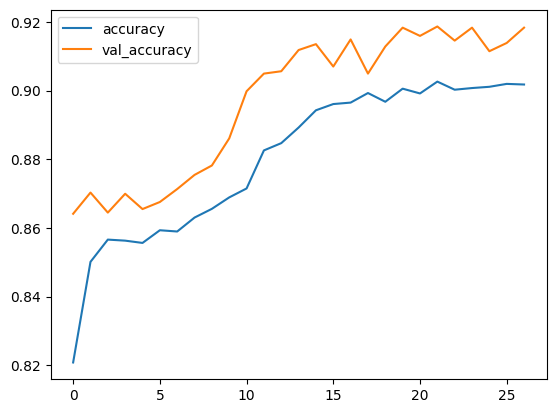

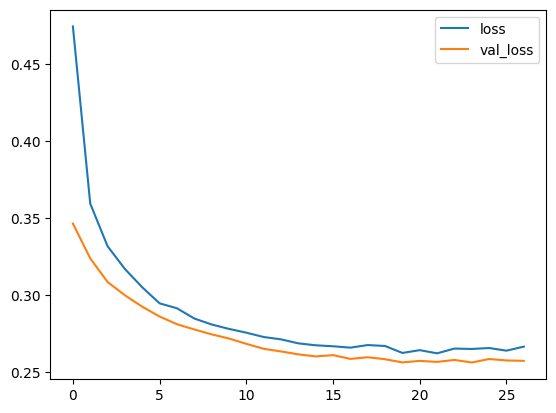

In [29]:
# Plot

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [30]:
# Model evaluation test set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

108/108 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1604
           1       0.90      0.94      0.92      1824

    accuracy                           0.91      3428
   macro avg       0.91      0.91      0.91      3428
weighted avg       0.91      0.91      0.91      3428



## Improvement Sequential API 

In [31]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [32]:
# Create Sequential API 
model_sequential2 = Sequential([
    Dense(30, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed), input_shape=(31,)), # Hidden Layer 1
    Dropout(0.2),  # Adding Dropout with rate 0.2 after Hidden Layer 1
    Dense(24, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)), # Hidden Layer 2
    Dropout(0.2),  # Adding Dropout with rate 0.2 after Hidden Layer 2
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)) # Output Layer
])

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

# Summary
model_sequential2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                744       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


- Penghapusan L2 Regularization:

    Pada model ini, L2 regularization dihapus untuk menyederhanakan model dan mencegah overfitting tanpa menggunakan regularisasi berlebihan.
    Alasan: Penggunaan dropout sudah cukup untuk melakukan regularisasi model, sehingga penggunaan L2 regularization tidak lagi diperlukan dalam kasus ini.

- Penggunaan Activation Function ReLU:

    Pada hidden layer 1 dan hidden layer 2, digunakan activation function ReLU.
    Alasan: ReLU adalah activation function yang umum digunakan dalam jaringan saraf, karena mampu mengatasi masalah vanishing gradient dan dapat mempercepat proses pelatihan.

- Menggunakan optimizer 'adam', yang merupakan metode optimizer adaptif yang menggabungkan keuntungan dari metode lain seperti RMSprop dan momentum. Adam optimizer secara adaptif menyesuaikan learning rate untuk setiap parameter, sehingga mempercepat proses pembelajaran dan konvergensi model.

In [33]:
# Mendefinisikan EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Training model menggunakan train_pipe dengan batch size 20, dan EarlyStopping
history_seq2 = model_sequential2.fit(train_pipe,
                                   epochs=30,
                                   batch_size=20,
                                   validation_data=val_pipe,
                                   callbacks=[early_stopping])

Epoch 1/30


826/826 [==============================] - 2s 2ms/step - loss: 0.4212 - accuracy: 0.7932 - val_loss: 0.2752 - val_accuracy: 0.8607
Epoch 2/30
826/826 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8553 - val_loss: 0.2604 - val_accuracy: 0.8655
Epoch 3/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2716 - accuracy: 0.8607 - val_loss: 0.2568 - val_accuracy: 0.8703
Epoch 4/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2658 - accuracy: 0.8661 - val_loss: 0.2557 - val_accuracy: 0.8675
Epoch 5/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2585 - accuracy: 0.8715 - val_loss: 0.2546 - val_accuracy: 0.8771
Epoch 6/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.8754 - val_loss: 0.2521 - val_accuracy: 0.8885
Epoch 7/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2496 - accuracy: 0.8875 - val_loss: 0.2463 - val_accuracy: 0.9077
Epoch 8/30
826/82

In [34]:
# Create DataFrame

history_seq_df2 = pd.DataFrame(history_seq2.history)
history_seq_df2

,loss,accuracy,val_loss,val_accuracy
0,0.421185,0.793168,0.275157,0.860673
1,0.291688,0.855309,0.260425,0.865477
2,0.271602,0.860699,0.256832,0.870281
3,0.265848,0.866089,0.255726,0.867536
4,0.258505,0.871540,0.254648,0.877145
5,0.253450,0.875356,0.252113,0.888469
6,0.249595,0.887469,0.246326,0.907687
7,0.243200,0.898855,0.237282,0.914207
8,0.234607,0.904488,0.226944,0.921414
9,0.225952,0.911453,0.221568,0.920384


<Axes: >

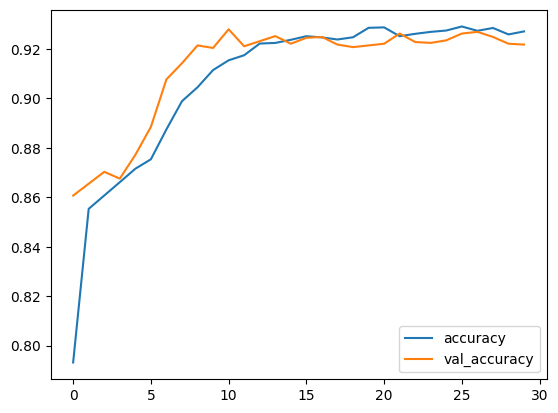

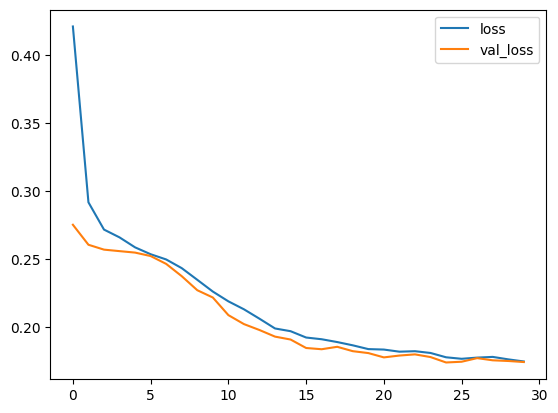

In [35]:
# Plot

history_seq_df2[['accuracy', 'val_accuracy']].plot()
history_seq_df2[['loss', 'val_loss']].plot()

In [36]:
# Model evaluation test set

y_pred_seq = model_sequential2.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

108/108 [==============================] - 0s 1000us/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1604
           1       0.93      0.92      0.93      1824

    accuracy                           0.92      3428
   macro avg       0.92      0.92      0.92      3428
weighted avg       0.92      0.92      0.92      3428



- Sebelum Improvement (model_sequential):

    Akurasi maksimum: sekitar 0.902610

    Loss minimum: sekitar 0.261935

- Setelah Improvement (model_sequential2):

    Akurasi maksimum: sekitar 0.929078
    
    Loss minimum: sekitar 0.174045

Dari hasil tersebut, model_sequential2 yang telah diimprovisasi memiliki akurasi yang lebih tinggi dan loss yang lebih rendah dibandingkan dengan model_sequential sebelumnya. Oleh karena itu, model_sequential2 dapat dianggap memiliki performansi yang lebih baik dibandingkan dengan model_sequential.

## Functional API

In [37]:
# Input layer
input_layer = Input(shape=(31,))

# Hidden layers dengan Dropout dan BatchNormalization
hidden_layer1 = Dense(32, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
dropout1 = Dropout(0.2)(hidden_layer1)  #Dropout 0.2 after Hidden Layer 1
batch_norm1 = BatchNormalization()(dropout1)

hidden_layer2 = Dense(24, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(batch_norm1)
dropout2 = Dropout(0.2)(hidden_layer2)  #Dropout 0.2 after Hidden Layer 2
batch_norm2 = BatchNormalization()(dropout2)

# Output layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(batch_norm2)

# Create the model
model_functional2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model_functional2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                1024      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 24)                792       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                             

Alasan penggunaan 'selu' sebagai aktivasi adalah karena sifat self-normalizing yang membantu mengurangi masalah vanishing/exploding gradients, serta penggunaan inisialisasi bobot 'HeNormal' untuk mengatur skala bobot agar sesuai dengan jumlah input dan output dari setiap layer. Penggunaan Dropout dan BatchNormalization membantu mencegah overfitting dan meningkatkan performa model

In [38]:
# Mendefinisikan EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=7, restore_best_weights=True)

# Train
history_functional2 = model_functional2.fit(train_pipe,
                                            epochs=30,
                                            batch_size=20,
                                            validation_data=val_pipe,
                                            callbacks=[early_stopping])

Epoch 1/30


826/826 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8010 - val_loss: 0.2709 - val_accuracy: 0.8593
Epoch 2/30
826/826 [==============================] - 2s 2ms/step - loss: 0.3219 - accuracy: 0.8457 - val_loss: 0.2680 - val_accuracy: 0.8590
Epoch 3/30
826/826 [==============================] - 2s 2ms/step - loss: 0.3077 - accuracy: 0.8488 - val_loss: 0.2645 - val_accuracy: 0.8610
Epoch 4/30
826/826 [==============================] - 2s 2ms/step - loss: 0.3041 - accuracy: 0.8519 - val_loss: 0.2643 - val_accuracy: 0.8651
Epoch 5/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2985 - accuracy: 0.8527 - val_loss: 0.2629 - val_accuracy: 0.8713
Epoch 6/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8520 - val_loss: 0.2623 - val_accuracy: 0.8785
Epoch 7/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2883 - accuracy: 0.8549 - val_loss: 0.2603 - val_accuracy: 0.8785
Epoch 8/30
826/82

In [39]:
# Create DataFrame 
history_functional2_df = pd.DataFrame(history_functional2.history)
history_functional2_df

,loss,accuracy,val_loss,val_accuracy
0,0.416140,0.801042,0.270933,0.859300
1,0.321945,0.845739,0.268040,0.858957
2,0.307690,0.848767,0.264512,0.861016
3,0.304084,0.851917,0.264302,0.865134
4,0.298458,0.852704,0.262868,0.871311
5,0.293961,0.851977,0.262300,0.878518
6,0.288344,0.854945,0.260292,0.878518
7,0.281372,0.859488,0.257296,0.887440
8,0.279525,0.860275,0.253997,0.902883
9,0.273354,0.866150,0.250373,0.913864


<Axes: >

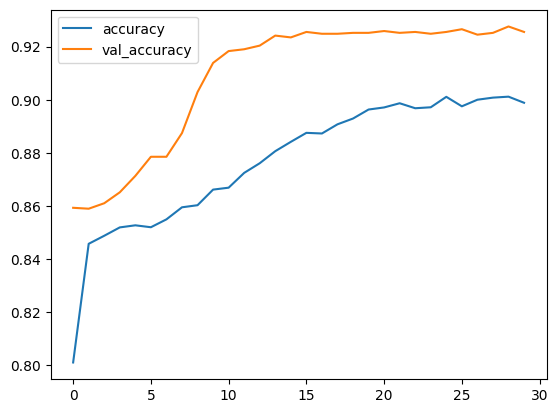

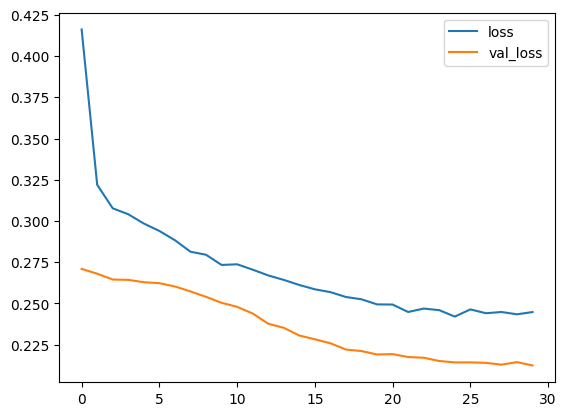

In [40]:
# Plot 
history_functional2_df[['accuracy', 'val_accuracy']].plot()
history_functional2_df[['loss', 'val_loss']].plot()


In [41]:
# Model evaluation test set
y_pred_functional2 = model_functional2.predict(X_test)
y_pred_functional2 = np.where(y_pred_functional2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_functional2))

108/108 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1604
           1       0.92      0.94      0.93      1824

    accuracy                           0.92      3428
   macro avg       0.92      0.92      0.92      3428
weighted avg       0.92      0.92      0.92      3428



## Imrpovement Functional API

In [42]:
# Input layer
input_layer = Input(shape=(31,))

# Hidden layers with Dropout
hidden_layer1 = Dense(32, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
dropout1 = Dropout(0.2)(hidden_layer1)  # Adding Dropout with rate 0.2 after Hidden Layer 1

hidden_layer2 = Dense(24, activation='selu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(dropout1)
dropout2 = Dropout(0.2)(hidden_layer2)  # Adding Dropout with rate 0.2 after Hidden Layer 2

# Output layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(dropout2)

# Create the model
model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model_functional1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense_6 (Dense)             (None, 32)                1024      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                792       
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,841
Trainable params: 1,841
Non-trainable p

- Menghapus BatchNormalization. Aktivasi 'selu' digunakan karena memiliki sifat self-normalizing, sehingga membantu dalam mengatasi masalah perubahan distribusi nilai dan mengurangi risiko vanishing/exploding gradients. Penggunaan 'selu' sebagai aktivasi juga menghilangkan kebutuhan BatchNormalization, yang dapat mengurangi kompleksitas model dan waktu pelatihan.

- Mempertahankan dropout layer dengan tingkat 0.2 setelah setiap hidden layer untuk menghindari overfitting. Penggunaan optimizer 'adam' tetap dipertahankan karena merupakan optimizer yang efisien dan adaptif dalam menyesuaikan learning rate.

In [43]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Train
history_functional1 = model_functional1.fit(train_pipe,
                                   epochs=30,
                                   batch_size=20,
                                   validation_data=val_pipe,
                                   callbacks=[early_stopping])

Epoch 1/30


826/826 [==============================] - 2s 2ms/step - loss: 0.4049 - accuracy: 0.8058 - val_loss: 0.2655 - val_accuracy: 0.8545
Epoch 2/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8502 - val_loss: 0.2600 - val_accuracy: 0.8648
Epoch 3/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2766 - accuracy: 0.8552 - val_loss: 0.2576 - val_accuracy: 0.8620
Epoch 4/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2719 - accuracy: 0.8565 - val_loss: 0.2563 - val_accuracy: 0.8782
Epoch 5/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2647 - accuracy: 0.8599 - val_loss: 0.2548 - val_accuracy: 0.8850
Epoch 6/30
826/826 [==============================] - 2s 2ms/step - loss: 0.2611 - accuracy: 0.8659 - val_loss: 0.2527 - val_accuracy: 0.8885
Epoch 7/30
826/826 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.8688 - val_loss: 0.2504 - val_accuracy: 0.9094
Epoch 8/30
826/82

In [44]:
# Create DataFrame 
history_functional1_df = pd.DataFrame(history_functional1.history)
history_functional1_df

,loss,accuracy,val_loss,val_accuracy
0,0.404901,0.805766,0.265468,0.854496
1,0.292686,0.850221,0.259967,0.864791
2,0.276631,0.855187,0.257595,0.862045
3,0.271937,0.856459,0.256283,0.878174
4,0.264702,0.859912,0.254756,0.885038
5,0.261106,0.865908,0.252654,0.888469
6,0.257323,0.868754,0.250385,0.909403
7,0.254436,0.876083,0.250035,0.897049
8,0.250957,0.881291,0.247069,0.911805
9,0.247916,0.888923,0.246167,0.913521


<Axes: >

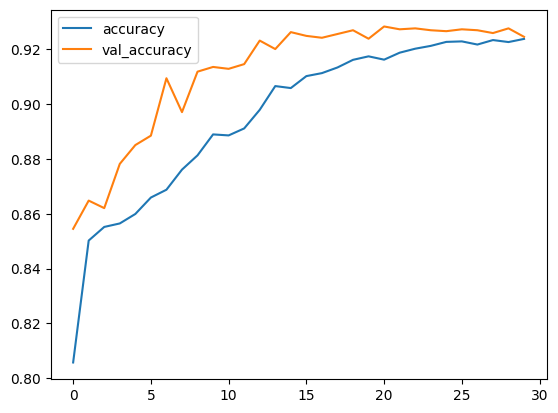

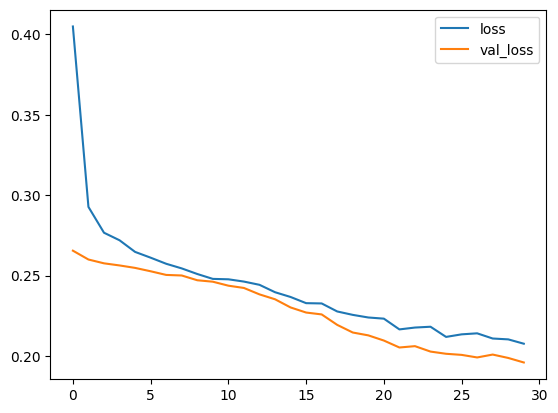

In [45]:
# Plot 
history_functional1_df[['accuracy', 'val_accuracy']].plot()
history_functional1_df[['loss', 'val_loss']].plot()


In [46]:
# Model evaluation test set
y_pred_functional1 = model_functional1.predict(X_test)
y_pred_functional1 = np.where(y_pred_functional1 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_functional1))

108/108 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1604
           1       0.92      0.94      0.93      1824

    accuracy                           0.93      3428
   macro avg       0.93      0.92      0.92      3428
weighted avg       0.93      0.93      0.92      3428



- Sebelum Improvement (model_functional2):

    Akurasi maksimum: sekitar 0.901096

    Loss minimum: sekitar 0.212389

- Setelah Improvement (model_functional1):

    Akurasi maksimum: sekitar 0.923748
    
    Loss minimum: sekitar 0.195932

Dari hasil tersebut, model_functional1 yang telah diimprovisasi memiliki akurasi yang lebih tinggi dan loss yang lebih rendah dibandingkan dengan model_functional2 sebelumnya. Oleh karena itu, model_functional1 dapat dianggap memiliki performansi yang lebih baik dibandingkan dengan model_functional2.

# 7 - Save best Model

- Setelah Improvement (model_functional1):

    Akurasi maksimum: sekitar 0.923748
    
    Loss minimum: sekitar 0.207603

- Setelah Improvement (model_sequential2):

    Akurasi maksimum: sekitar 0.929078
    
    Loss minimum: sekitar 0.174045

Berdasarkan hasil tersebut, model_sequential2 memiliki akurasi maksimum yang lebih tinggi dan loss minimum yang lebih rendah dibandingkan dengan model_functional1. Oleh karena itu, model_sequential2 dapat dianggap sebagai best model, karena mampu memberikan performansi yang lebih baik dalam klasifikasi dan memiliki loss yang lebih rendah.

In [47]:
# Save Pipeline

with open('prepocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

In [48]:
# Model Summary

model_sequential2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                744       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Freeze Model

model_sequential2.trainable = False
model_sequential2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                744       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,729
Trainable params: 0
Non-trainable params: 1,729
_________________________________________________________________


In [50]:
# Save best model

model_sequential2.save('model_sequential2_Churn.h5')

# 8 - Inference

In [51]:
# Create A New Data

data_inf = {
    'age': 63,
    'gender': 'M',
    'region_category': 'Village',
    'membership_category': 'No Membership',
    'joining_date': '2015-12-23',
    'joined_through_referral': 'No',
    'preferred_offer_types': 'Credit/Debit Card Offers',
    'medium_of_operation': 'Desktop',
    'internet_option': 'Fiber_Optic',
    'last_visit_time':'14:28:05', 
    'days_since_last_login':19, 
    'avg_time_spent': 56.67, 
    'avg_transaction_value':15678.14,
    'avg_frequency_login_days':11.0, 
    'points_in_wallet':590.22, 
    'used_special_discount':'No',
    'offer_application_preference':'Yes', 
    'past_complaint':'No', 
    'complaint_status':'Not Applicable',
    'feedback':'Too many ads'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,63,M,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,19,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads


In [52]:
# Predict using ANN

data_inf_transform = preprocessor.transform(data_inf)
y_pred_inf = model_sequential2.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 24ms/step


array([[1]])

Berdasarkan data baru yang telah dianalisis, customer terprediksi akan berhenti berlangganan sehingga direkomendasikan ke perusahaan untuk dapat meningkatkan retensi pelanggan dengan personalisasi pengalaman pelanggan, implementasi program loyalitas, meningkatkan layanan pelanggan, dan berkomunikasi secara terbuka dengan pelanggan.

# 9 - Kesimpulan

- Data terdiri dari 37.010 baris dan 22 kolom, dengan beberapa kolom mengandung missing value.
- Data terbagi menjadi fitur numerik dan kategori.
- Missing value telah dihapus agar tidak mengganggu kinerja model. Walaupun sebenarnya masuk ke tipe MCAR (tidak memiliki korelasi terhadap target)
- Terdapat keseimbangan dan ketidakseimbangan dalam beberapa data kategori.
- Data target relatif seimbang.
- Fitur numerik memiliki rentang dan distribusi yang bervariasi, serta beberapa outliers yang telah ditangani. Outliers dihandling dengan wisorizer untuk mengurangi dampak yang ditimbulkan oleh outliers
- Fitur yang memiliki korelasi tinggi dan dilakukan proses pemodelan adalah: region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, offer_application_preference, feedback, avg_transaction_value, avg_frequency_login_days, points_in_wallet.
- Model dengan arsitektur functional API dan Sequential API telah dibangun, dievaluasi, dan telah dilakukan improve.
- Model_sequential2 dipilih sebagai best model berdasarkan evaluasi kinerja.
- Data baru yang digunakan terprediksi akan berhenti berlangganan, sehingga perusahaan direkomendasikan untuk meningkatkan retensi pelanggan dengan personalisasi pengalaman, implementasi program loyalitas, meningkatkan layanan pelanggan, dan berkomunikasi secara terbuka dengan pelanggan.

Dampak bisnis:

- Mengurangi Churn Pelanggan: 

    Model churn prediction memungkinkan perusahaan untuk mengidentifikasi pelanggan yang berisiko tinggi untuk berhenti berlangganan (churn) di masa depan. Dengan demikian, perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan tersebut dengan menawarkan insentif atau layanan khusus, sehingga mengurangi tingkat churn.

- Meningkatkan Retensi Pelanggan: 


    Dengan lebih baik memahami perilaku pelanggan dan faktor-faktor yang mempengaruhi keputusan mereka untuk tetap berlangganan, perusahaan dapat meningkatkan upaya retensi pelanggan. Hal ini dapat mencakup penyempurnaan layanan, peningkatan kualitas produk, dan personalisasi pengalaman pelanggan.

- Optimasi Strategi Pemasaran: 

    Model churn prediction dapat membantu perusahaan dalam merencanakan strategi pemasaran yang lebih efektif. Dengan menargetkan pelanggan yang berisiko tinggi untuk berhenti berlangganan, perusahaan dapat mengalokasikan sumber daya pemasaran dengan lebih efisien dan menghindari biaya yang tidak perlu untuk menarik pelanggan baru.

- Peningkatan Keuntungan dan Efisiensi Operasional: 

    Dengan mengurangi churn, perusahaan dapat mempertahankan basis pelanggan yang lebih stabil dan mengurangi biaya akuisisi pelanggan baru. Hal ini dapat meningkatkan pendapatan dan keuntungan perusahaan dalam jangka panjang.

- Peningkatan Kepuasan Pelanggan: 

    Dengan lebih proaktif dalam mengatasi masalah dan kebutuhan pelanggan, perusahaan dapat meningkatkan kepuasan pelanggan secara keseluruhan. Kepuasan pelanggan yang lebih tinggi berarti peluang yang lebih besar untuk meningkatkan loyalitas pelanggan dan mendapatkan rekomendasi positif dari pelanggan kepada orang lain.

- Pengambilan Keputusan yang Lebih Cermat: 

    Dengan adanya model churn prediction, perusahaan dapat membuat keputusan bisnis yang lebih cermat dan berdasarkan data. Pengambilan keputusan yang lebih informasional dan berdasarkan analisis data dapat mengurangi risiko dan mengarah pada langkah-langkah strategis yang lebih sukses.

Model_sequential2 (best model):
- Kelebihan:

    Model ini berhasil mencapai akurasi maksimum yang lebih tinggi (sekitar 0.929078) dan loss minimum yang lebih rendah (sekitar 0.174045) dibandingkan dengan model_functional1.
    Penggunaan Dropout membantu mengurangi overfitting dan mempercepat proses training.
    Arsitektur model yang sederhana dan efisien.
- Kelemahan:

    Penggunaan Dropout dengan tingkat 0.2 mungkin masih terlalu tinggi dan dapat menyebabkan underfitting pada beberapa kasus. Mungkin perlu mencoba nilai Dropout yang berbeda untuk menemukan tingkat yang optimal.
    Penggunaan fungsi aktivasi "relu" dan "selu" dengan penyesuaian Dropout dan kernel initializer tertentu dapat bekerja dengan baik pada dataset tertentu, tetapi mungkin membutuhkan penyesuaian jika digunakan pada dataset yang berbeda.

Model dapat diimprove dengan:

1. Penambahan Fitur Eksternal: Dapat dicoba dengan menambahkan fitur eksternal yang relevan dari sumber data lain untuk meningkatkan performa model.

2. Kembali melakukan optimasi parameter pada model untuk mencari konfigurasi terbaik yang menghasilkan performa model yang lebih baik lagi.